In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Image

In [8]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
from scipy.interpolate import interp1d, UnivariateSpline,splrep
from scipy.integrate import quad, dblquad
from scipy.special import j0
from scipy.misc import derivative
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import datetime
from astropy.table import Table
#import fitsio

### >>> This cell is different, I use H0 = 67, Ross uses 100

In [3]:
def H(a):
    H0=100
    om=0.3089
    ol=1.-om
    result=H0*((om/(1.*a**3))+ol)**0.5
    return result

a = 1.0 / (1.0 + 2.0)
H(a)

300.5228776649126

In [4]:
def chi(z):
    athen=1/(1+z)
    c=3.*10**5
    chiint=integrate.quad(lambda a: 1/((a**2)*H(a)), athen, 1)
    result=c*chiint[0]
    return result

chi(2.0)

3601.096289906997

### >>> Agree with Ross again with little h definition

In [5]:
zs201=np.arange(201)*0.01
chiarray=np.zeros(201)
for i in range(0,201):
    chiarray[i]=chi(zs201[i])

zchiinterp=sp.interpolate.InterpolatedUnivariateSpline(chiarray,zs201,k=5)

h=0.6774
def zchi(chi):
    result=zchiinterp(chi)
    return result

#check with ned wright site
print(zchi(100))
print(zchi(1000))
print(zchi(1317))  #my chis are true chi*h....so this is 1945 real mpc
print(zchi(1945))  #this is 2871 real mpc
print(zchi(2871))

0.03359654087434861
0.36557790249865
0.4991677132128007
0.800533726130937
1.3746073586234788


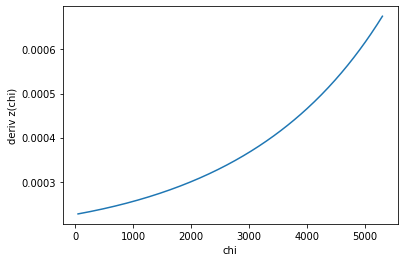

In [6]:
derivarray=np.zeros(201)
for j in range(0,201):
    derivarray[j]=derivative(zchi,chiarray[j])

#print (chiarray)
#print (derivarray)
plt.plot(chiarray[1:200]/h,derivarray[1:200]*h)
plt.xlabel('chi')
plt.ylabel('deriv z(chi)')
plt.show()

### We agree up to this point. 

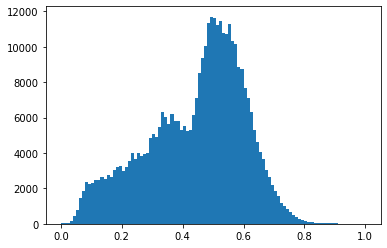

In [12]:
CMASSLOWZTOT_South_Tbl = Table.read('/Users/megantabbutt/CosmologyDataProducts/' 
                                    + 'galaxy_DR12v5_CMASSLOWZTOT_South.fits', format='fits')
del CMASSLOWZTOT_South_Tbl['FRACPSF', 'EXPFLUX', 'DEVFLUX', 'PSFFLUX', 'MODELFLUX', 'FIBER2FLUX', 'R_DEV', 'EXTINCTION', 
                           'PSF_FWHM', 'SKYFLUX', 'IMAGE_DEPTH', 'TILE', 'RERUN', 'CAMCOL', 'FIELD', 'ID', 'ICHUNK', 'RUN', 
                          'IPOLY', 'AIRMASS', 'EB_MINUS_V', 'IMATCH', 'WEIGHT_FKP', 'WEIGHT_CP', 'WEIGHT_NOZ', 'WEIGHT_STAR',
                          'WEIGHT_SEEING', 'WEIGHT_SYSTOT', 'COMP', 'PLATE', 'FIBERID', 'MJD', 'FINALN', 'SPECTILE', 'ICOLLIDED', 
                          'INGROUP', 'MULTGROUP', 'ISECT']
CMASSLOWZTOT_South_DF = CMASSLOWZTOT_South_Tbl.to_pandas()
#CMASSLOWZTOT_South_DF.head(3)

zs1=np.arange(101)*0.01+0.
zs=np.arange(100)*0.01+0.005
b=plt.hist(CMASSLOWZTOT_South_DF['Z'],bins=zs1)
pz=b[0]
pz=pz*100/np.sum(b[0])
plt.show()

normal (1.0001082842865217, 4.630657846275047e-08)


/Users/megantabbutt/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


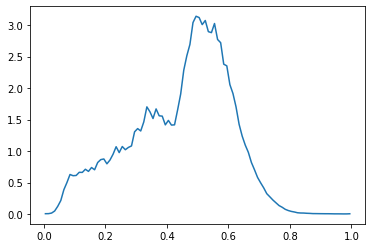

In [14]:
W2 = sp.interpolate.InterpolatedUnivariateSpline(zs,pz,k=5)

w2array=np.zeros(len(zs))
for j in range(0,len(w2array)):
    w2array[j]=W2(zs[j])

plt.plot(zs,w2array)
normal=integrate.quad(lambda z: W2(z),0.0,1.0)
print ('normal', normal)
plt.show()

### Kinda agree here?  ^^^ question about oscillation in mine, maybe should smooth?

normal2 (1.0001083077098847, 1.1990569142542913e-07)


/Users/megantabbutt/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


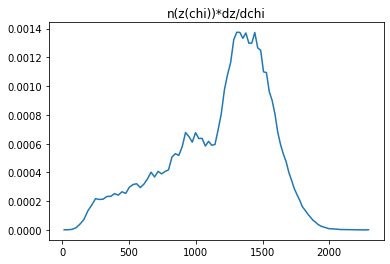

In [16]:
normal2=integrate.quad(lambda chi: W2(zchi(chi))*derivative(zchi,chi),chi(0.0),chi(1.0))
print ('normal2',normal2)

newchiarray=np.zeros(len(zs))
for p in range(0,len(newchiarray)):
    newchiarray[p]=chi(zs[p])

w22array=np.zeros(len(zs))
for jj in range(0,len(w22array)):
    w22array[jj]=W2(zchi(newchiarray[jj]))*derivative(zchi,newchiarray[jj])
plt.plot(newchiarray,w22array)
plt.title('n(z(chi))*dz/dchi')
plt.show()

### We still agree here